In [4]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [5]:
function objective_func_G_scaled(state, images, lambdas)
    s = 0
    for i in images
        temp = 0 
        temp =  (vec(state)'*vec(i))^2
        s += lambdas[findfirst(x -> x == i, images)] * temp
    end
    return (s * 0.25)
end

objective_func_G_scaled (generic function with 1 method)

In [6]:

function unique_random_binary_images(num, cardinality)
    images = []
    i = 0
    if num > cardinality
        print("FAILED")
        return 
    end
    while i < num
        v = rand((-1,1),cardinality)
        if !(v in images)
            push!(images, v)
            i += 1
        end
    end
    return reshape.(images, Int(sqrt(cardinality)), Int(sqrt(cardinality)))
end

unique_random_binary_images(64,256)

64-element Vector{Matrix{Int64}}:
 [-1 -1 … 1 -1; 1 1 … -1 1; … ; -1 -1 … -1 1; -1 -1 … -1 1]
 [-1 1 … -1 -1; 1 1 … -1 -1; … ; -1 1 … -1 1; -1 -1 … -1 1]
 [1 1 … 1 1; -1 -1 … 1 -1; … ; 1 1 … -1 1; 1 -1 … 1 1]
 [1 1 … 1 1; 1 1 … -1 -1; … ; -1 -1 … 1 -1; 1 1 … -1 1]
 [1 -1 … -1 1; -1 1 … 1 1; … ; 1 -1 … 1 -1; 1 -1 … 1 -1]
 [1 1 … -1 1; 1 -1 … -1 -1; … ; -1 -1 … -1 1; 1 1 … 1 -1]
 [1 1 … 1 -1; -1 1 … -1 -1; … ; 1 1 … -1 -1; -1 -1 … 1 -1]
 [-1 1 … -1 -1; -1 -1 … -1 -1; … ; -1 1 … -1 1; -1 -1 … -1 1]
 [-1 1 … -1 1; -1 1 … -1 1; … ; -1 1 … -1 -1; -1 -1 … -1 1]
 [1 1 … 1 1; 1 1 … 1 -1; … ; 1 1 … -1 -1; -1 -1 … 1 1]
 [1 1 … 1 -1; 1 -1 … -1 -1; … ; 1 -1 … 1 -1; 1 1 … -1 -1]
 [-1 1 … -1 1; -1 1 … 1 1; … ; 1 1 … 1 -1; -1 -1 … 1 1]
 [-1 1 … 1 1; -1 1 … -1 -1; … ; -1 1 … -1 1; 1 1 … 1 1]
 ⋮
 [-1 -1 … 1 1; 1 -1 … 1 1; … ; 1 1 … 1 -1; 1 1 … -1 -1]
 [1 1 … 1 -1; 1 -1 … -1 1; … ; 1 -1 … 1 1; 1 1 … -1 -1]
 [1 -1 … 1 -1; -1 -1 … -1 1; … ; 1 -1 … 1 1; 1 1 … -1 1]
 [-1 1 … 1 1; -1 -1 … -1 1; … ; 1 1 … -1 1

In [7]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


In [8]:
parameters["images"] = unique_random_binary_images(4,16)

4-element Vector{Matrix{Int64}}:
 [-1 -1 -1 -1; -1 1 1 1; -1 1 1 1; -1 1 1 1]
 [-1 -1 -1 -1; -1 -1 -1 -1; 1 1 1 1; -1 1 -1 -1]
 [-1 -1 -1 -1; 1 -1 1 1; 1 1 1 1; -1 1 1 -1]
 [1 1 -1 -1; -1 -1 1 -1; 1 -1 -1 1; -1 1 -1 -1]

In [9]:
A = zeros(length(parameters["images"]),length(parameters["images"]))
            for i in 1:(length(parameters["images"]))
                for k in i:(length(parameters["images"]))
                    D_ij = (vec(parameters["images"][i])' * vec(parameters["images"][k]))^2
                    A[i,k] = D_ij
                    A[k,i] = D_ij
                end
            end
            res = 1*ones(length(parameters["images"])) # change coeff if precision is not ideal
            lambdas = A \ res
            parameters["scaling"] = lambdas

4-element Vector{Float64}:
 0.0030818560914422422
 0.002621654400159492
 0.0024264424914023693
 0.0034515126846206244

In [10]:
function objective_func_G_scaled(state, images, lambdas)
    s = 0
    for i in images
        temp = 0 
        temp =  (vec(state)'*vec(i))^2
        s += lambdas[findfirst(x -> x == i, images)] * temp
    end
    return (s * 0.25)
end

objective_func_G_scaled (generic function with 1 method)

In [11]:
for i in 1:length(parameters["images"])
    println("$(i)th image, G value is $(objective_func_G_scaled(parameters["images"][i], parameters["images"], lambdas))")
end

1th image, G value is 0.25
2th image, G value is 0.25
3th image, G value is 0.25
4th image, G value is 0.25


# V2

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
took 87.3625785 seconds


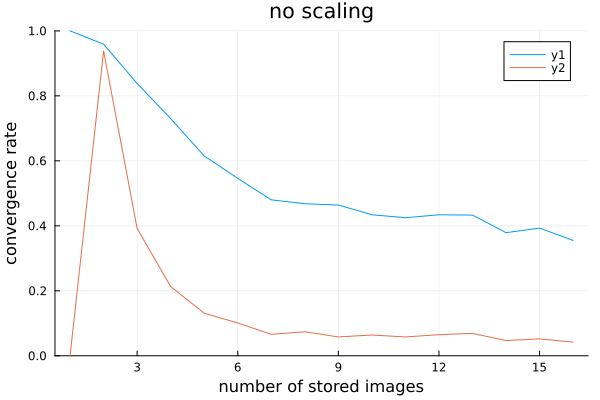

In [41]:
convergences_16 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
parameters["scaling"] = 1.0
times_done = 1000

elp = @elapsed begin
    for p in 1:16
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,16)
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_16["image_count"], p)
        push!(convergences_16["conv_16"], conv_16/times_done)
        push!(convergences_16["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_16["image_count"], 
    [convergences_16["conv_16"], convergences_16["multiple_16"]], 
    title = "no scaling",
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)    
)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
took 9.7906975 seconds


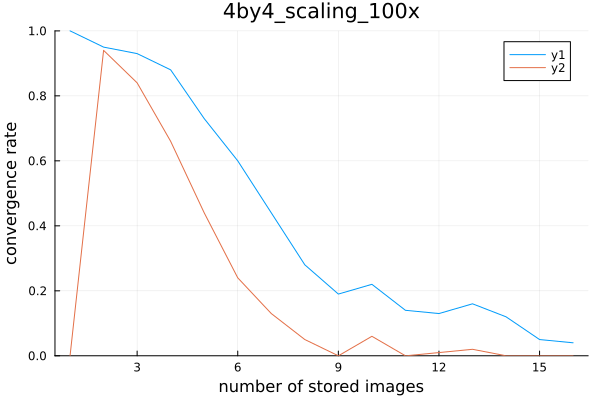

In [36]:
convergences_16 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
parameters["scaling"] = 1.0
s = 100
times_done = 100
elp = @elapsed begin
    for p in 1:16
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,16)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_16["image_count"], p)
        push!(convergences_16["conv_16"], conv_16/times_done)
        push!(convergences_16["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_16["image_count"], 
    [convergences_16["conv_16"], convergences_16["multiple_16"]],
    title = "4by4_scaling_$(s)x", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
took 224.35577325 seconds


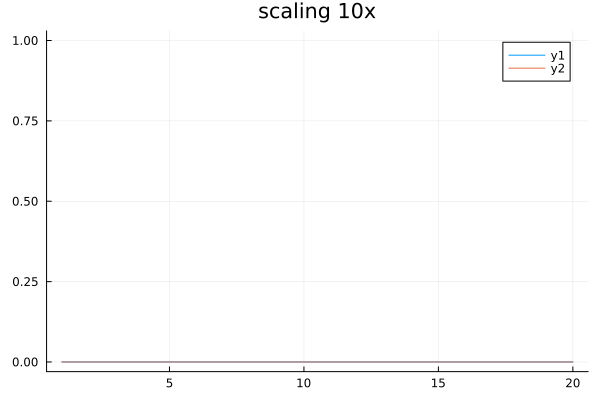

In [54]:
convergences_64 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
times_done = 100
s= 1
elp = @elapsed begin
    for p in 1:20
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,64)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_64["image_count"], p)
        push!(convergences_64["conv_16"], conv_16/times_done)
        push!(convergences_64["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_64["image_count"], 
    [convergences_64["conv_16"], convergences_64["multiple_16"]],
    title = "8by8_scaling_$(s)x", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
took 194.294807083 seconds


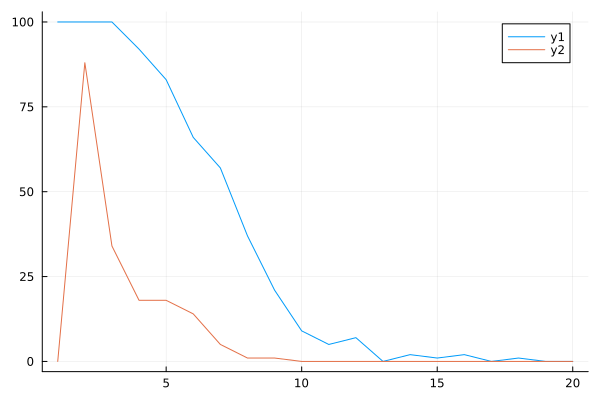

In [26]:
convergences_64 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)

times_done = 100
elp = @elapsed begin
    for p in 1:20
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["scaling"] = 1.0
            parameters["images"] = unique_random_binary_images(p,64)
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_64["image_count"], p)
        push!(convergences_64["conv_16"], conv_16/times_done)
        push!(convergences_64["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_64["image_count"], 
    [convergences_64["conv_16"], convergences_64["multiple_16"]],
    title = "8by8_scaling_no_weights", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

2
took 35.706075917 seconds


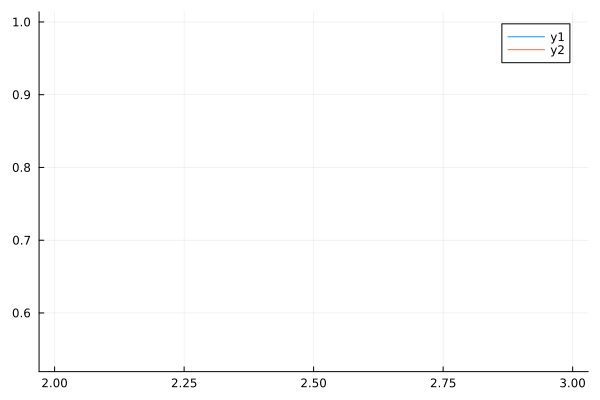

In [9]:
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
times_done = 100
elp = @elapsed begin
    for p in 2:2
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,256)
            parameters["scaling"] = 1.0
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/times_done)
        push!(convergences_256["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_256["image_count"], 
    [convergences_256["conv_16"], convergences_256["multiple_16"]],
    title = "16by16_scaling_no_weights", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

2
took 35.706075917 seconds


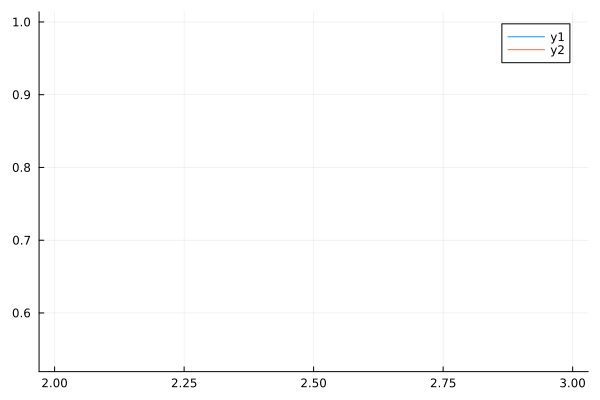

In [9]:
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
s=1
times_done = 100
elp = @elapsed begin
    for p in 2:2
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,256)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/times_done)
        push!(convergences_256["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_256["image_count"], 
    [convergences_256["conv_16"], convergences_256["multiple_16"]],
    title = "16by16_scaling_$(s)x", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

In [13]:
println(convergences_256["multiple_16"])
k = parameters["images"]
dot(k[1],k[2])

Any[0.5333333333333333]


2

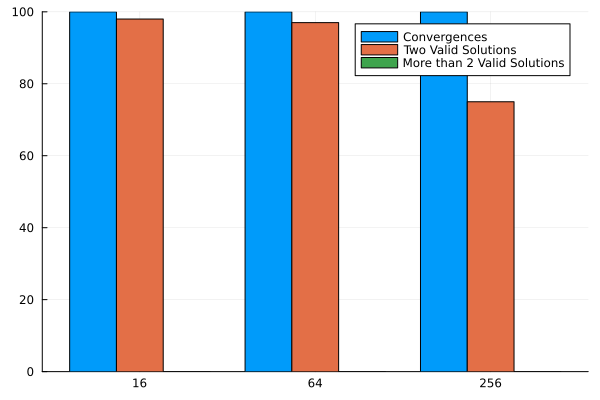

In [23]:
sizes = ["16", "64", "256"]
convs = [conv_16, conv_64, conv_256]
twos = [twos_16, twos_64, twos_256]
others = [others_16, others_64, others_256]

groupedbar(sizes, [convs twos others], bar_position = :dodge,
           labels = ["Convergences" "Two Valid Solutions" "More than 2 Valid Solutions"])

# HN OG

took 6.610878083 seconds


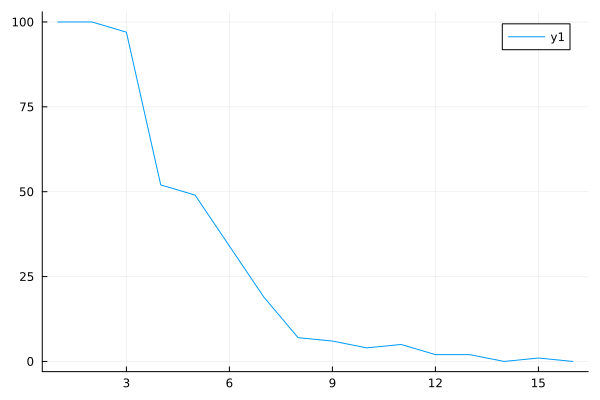

In [40]:
convergences_16_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:16
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,16)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_16_hn["image_count"], p)
        push!(convergences_16_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_16_hn["image_count"], [convergences_16_hn["conv_16"]])

In [ ]:
image_set = orthogonal_image_generator(64)
convergences_64_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:64
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,64)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_64_hn["image_count"], p)
        push!(convergences_64_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_64_hn["image_count"], [convergences_64_hn["conv_16"]])

In [29]:
image_set = orthogonal_image_generator(256)
convergences_256_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:256
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,256)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_256_hn["image_count"], p)
        push!(convergences_256_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_256_hn["image_count"], [convergences_256_hn["conv_16"]])

83
took 199.903060958 seconds


┌ Warning: Keyword argument bar_position not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, 

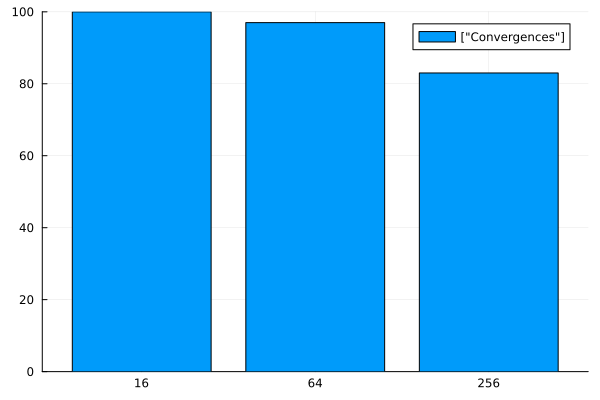

In [32]:
sizes = ["16", "64", "256"]
convs = [hn_conv_16, hn_conv_64, hn_conv_256]

bar(sizes, convs, bar_position = :dodge,
           labels = ["Convergences"])